# Sigamos con segmentación semántica

## FCN (Fully Convolutional Network)

https://arxiv.org/pdf/1411.4038.pdf

Cuando hacíamos clasificadores, su estructura en términos generales lucía más o menos de esta manera:

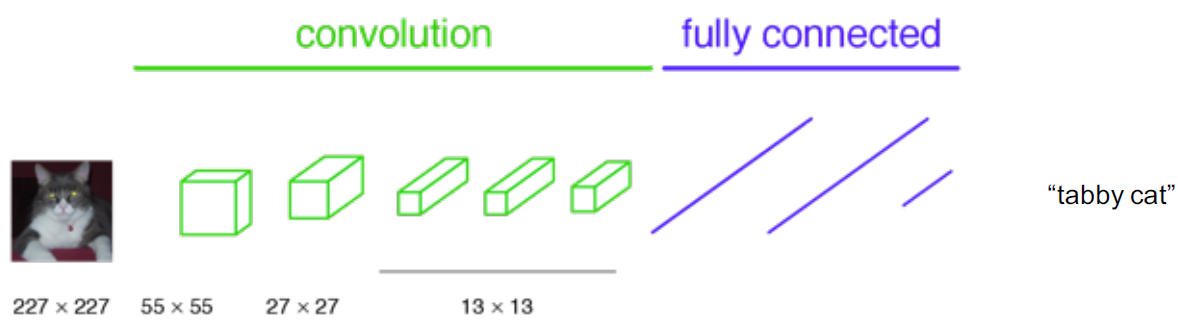

## Pero también podríamos usar convoluciones de $1 \times 1$

Hasta ahora sabíamos que las convoluciones de $1\times 1$ servían para reducir número de canales

Tomando un ejemplo, supongamos que tenemos una capa convolucional (de propósito general) que emite un tensor de forma (B, K, H, W) donde,


- B representa el tamaño del batch.
- K es el número de filtros convolucionales o kernels
- H, W son las dimensiones espaciales, es decir, la altura y la anchura.

Si aplicamos una convolución 2D con F filtros de $1\times1$, ¿Cuál sería la dimensión de la salida?

Podriamos pensar cada filtro F como una neurona de una capa densa (FC). Se puede mostrar que estas operaciones pueden realizar tareas equivalentes.

[texto del vínculo](https://)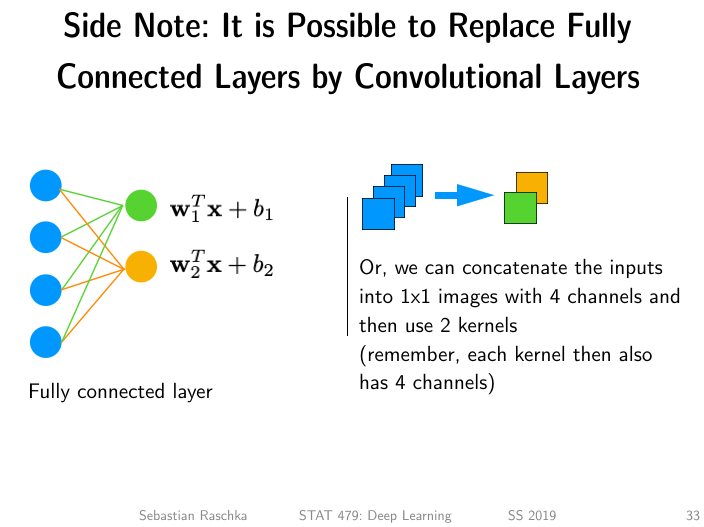

In [ ]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights = 'imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Model

model2 = Model(inputs = model.input, outputs = model.layers[-5].output)

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.layers import Conv2D

fcv1 = Conv2D(4096,(7, 7),activation='relu')(model2.layers[-1].output)
fcv2 = Conv2D(4096,(1, 1),activation='relu')(fcv1)
fcv3 = Conv2D(1000,(1, 1),activation='softmax')(fcv2)

fcnModelo = Model (inputs = model.input, outputs = fcv3)


In [ ]:
fcnModelo.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

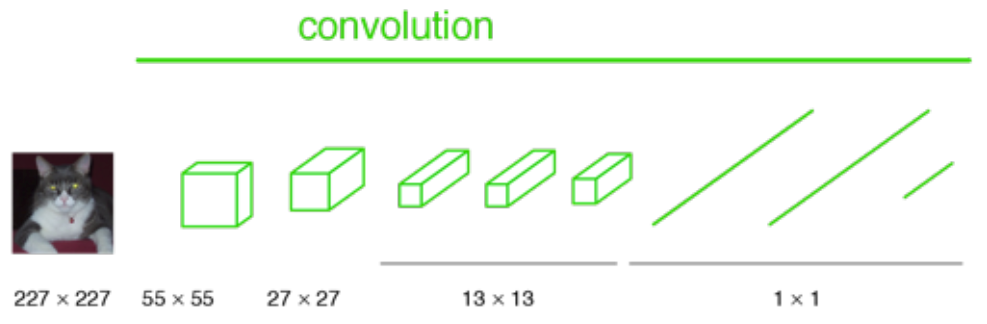

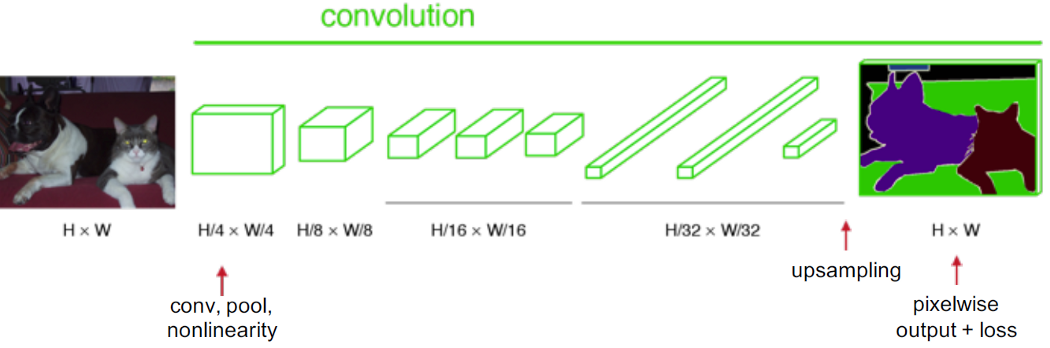

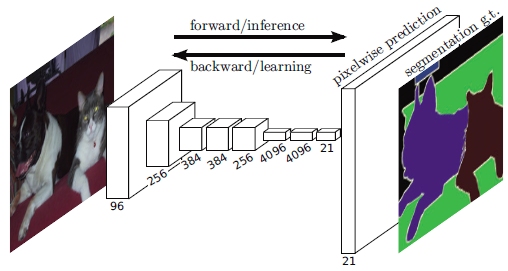

Recordando convolución transpuesta

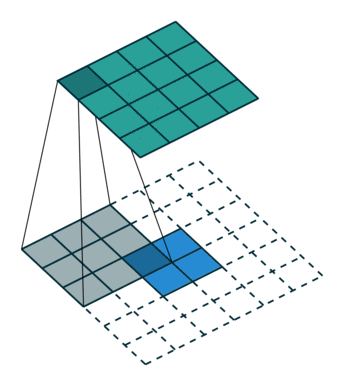

Haciendo una deconvolucion de 32

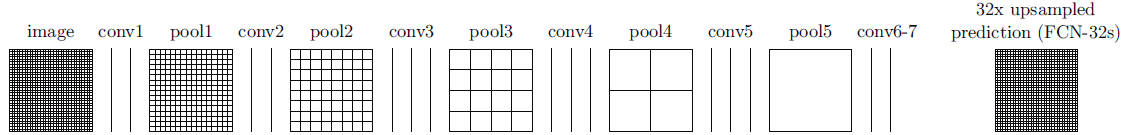

Para recuperar información espacial sumaron los valoresde pooling anteriores

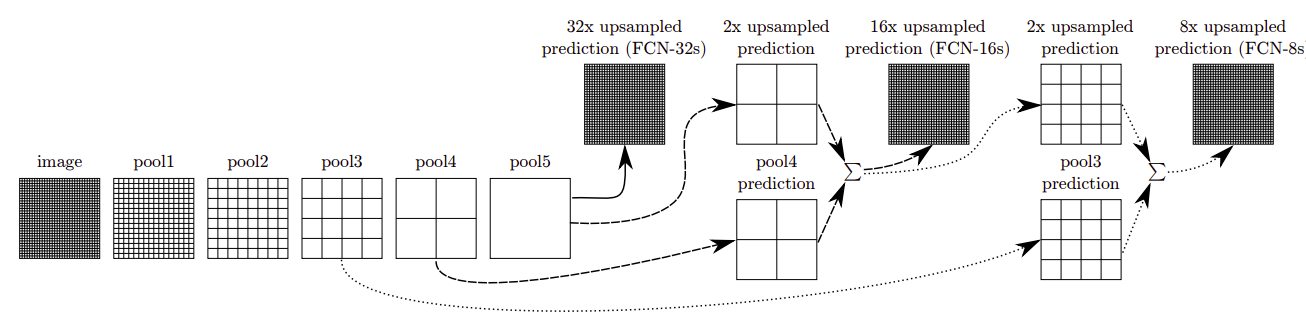

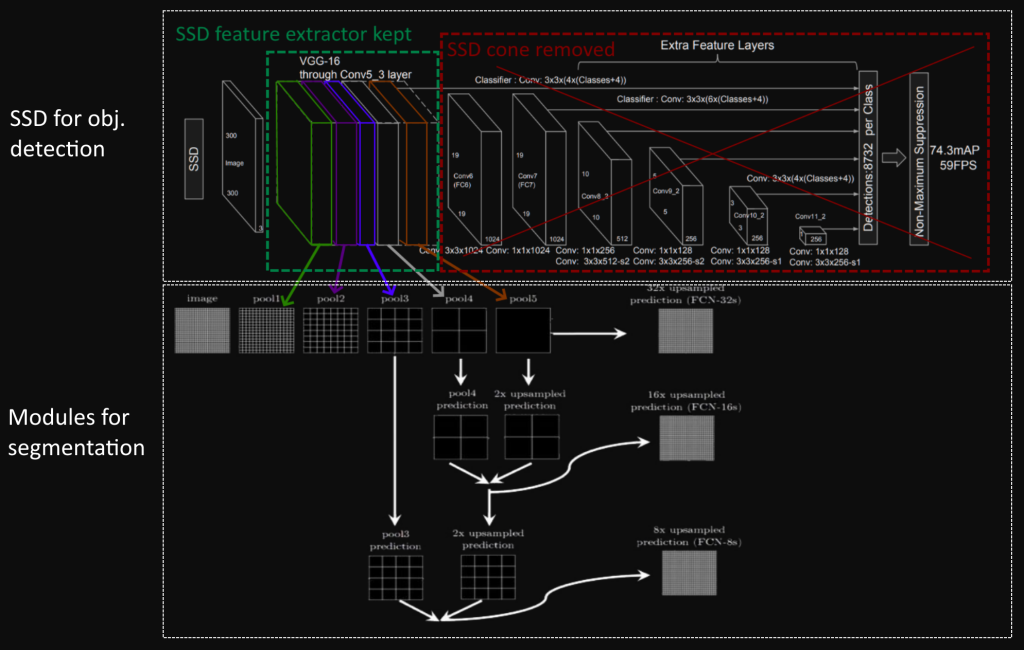

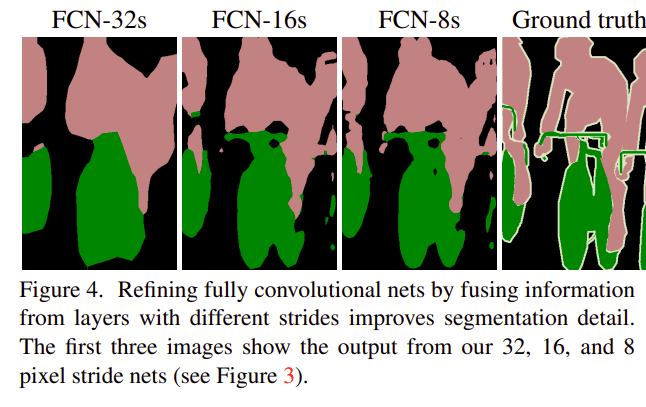

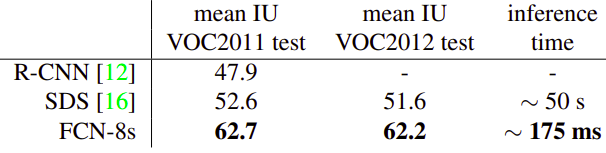

## Autoencoders



Antes de continuar vamos a ver un poco de la arquitectura de un Autoencoder:

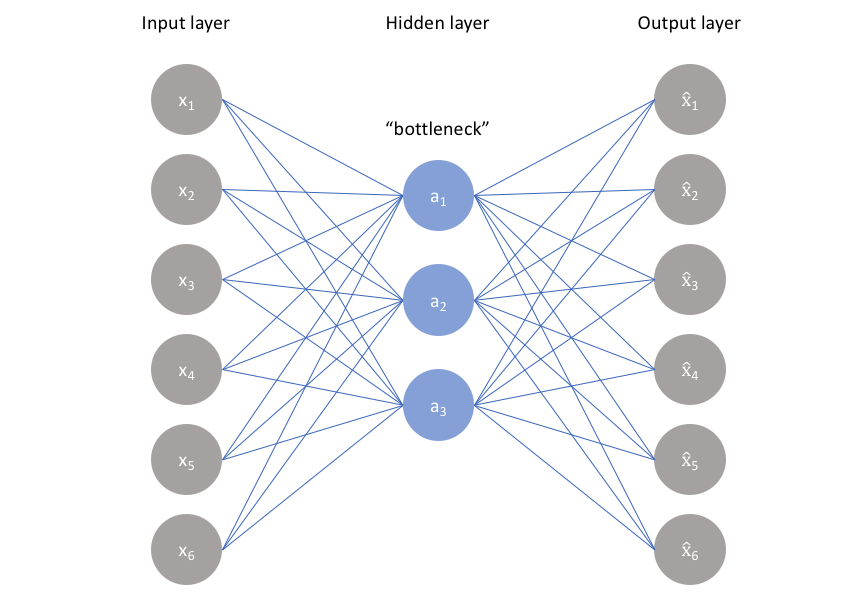

## UNET (2015)

https://arxiv.org/pdf/1505.04597.pdf




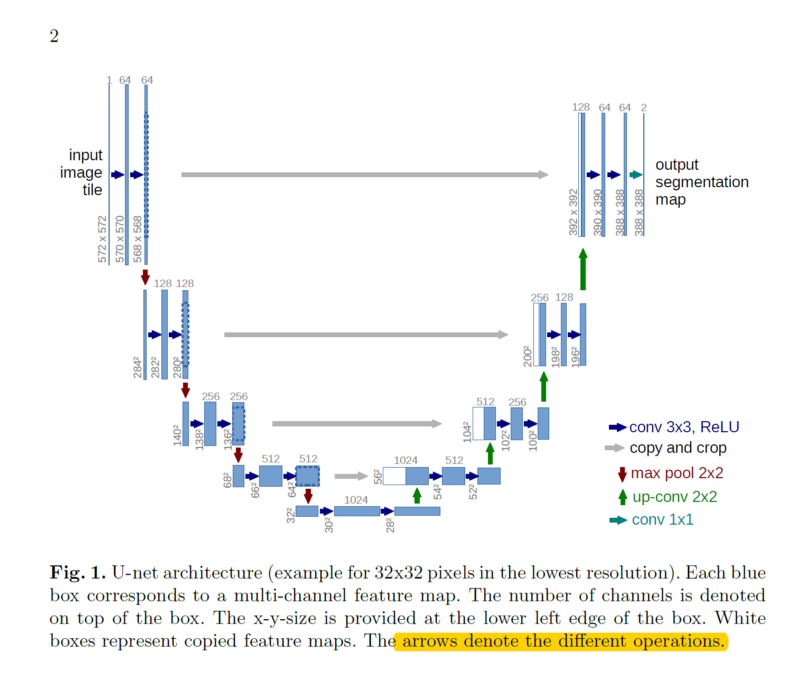

- Usa convolución transpuesta

## SEGNET (2017)

https://arxiv.org/pdf/1511.00561v3.pdf

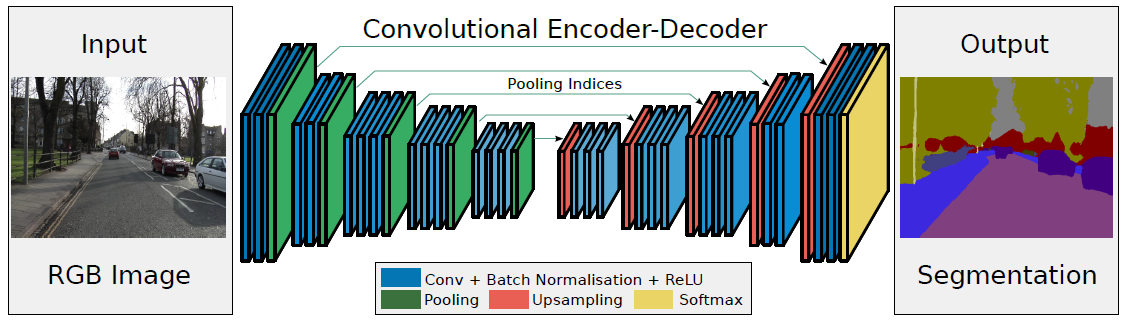

Codificador

En el codificador se realizan las convoluciones y el max pooling.
Hay 13 capas convolucionales de VGG-16. (Las capas originales totalmente conectadas se descartan).

Mientras se realiza el max pooling 2×2, se almacenan los índices de max pooling correspondientes (ubicaciones).

Decodificador

Usan Max- unpooling

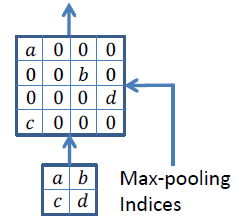

Diferencias con U-Net

- Se utiliza para la segmentación de imágenes biomédicas.

- En lugar de utilizar índices de agrupación, los mapas de características completos se transfieren del codificador al decodificador, y luego con la concatenación para realizar la convolución.
- Esto hace que el modelo sea más grande y necesite más memoria.

PSPNet (2017)

https://arxiv.org/pdf/1612.01105.pdf

Proponen utilizar información contextual.

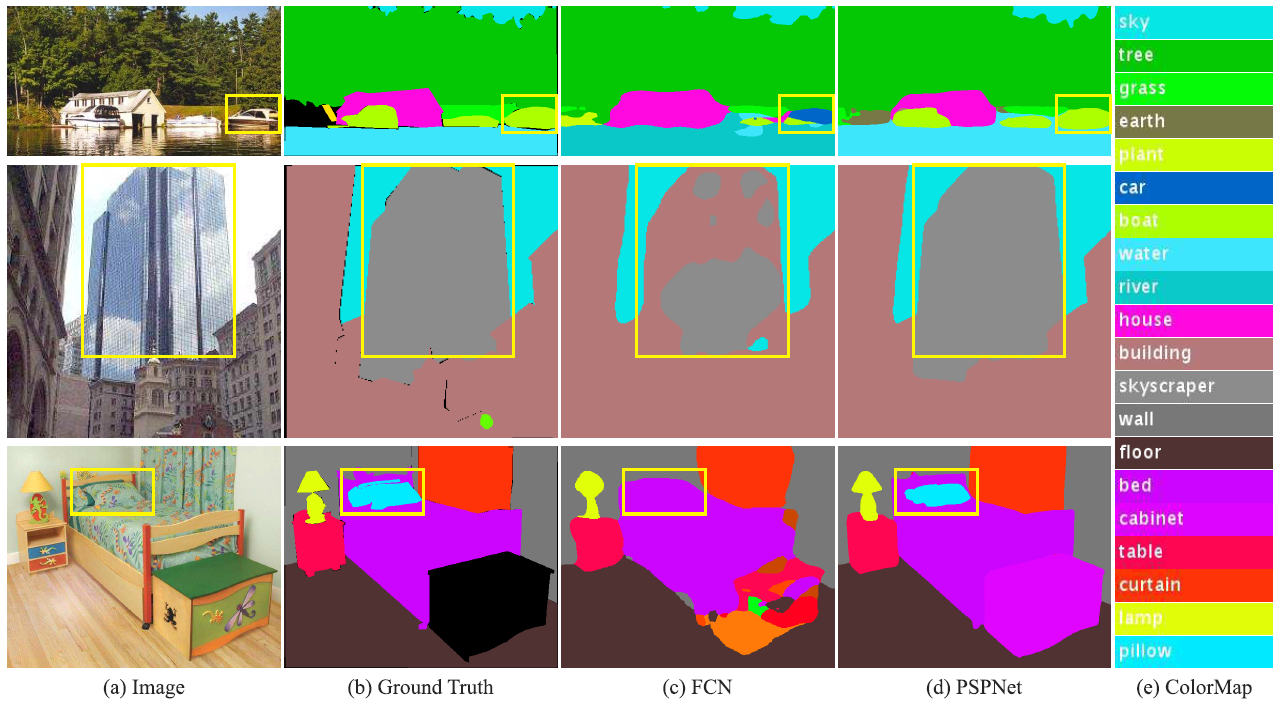

Su método recuerda a un detector

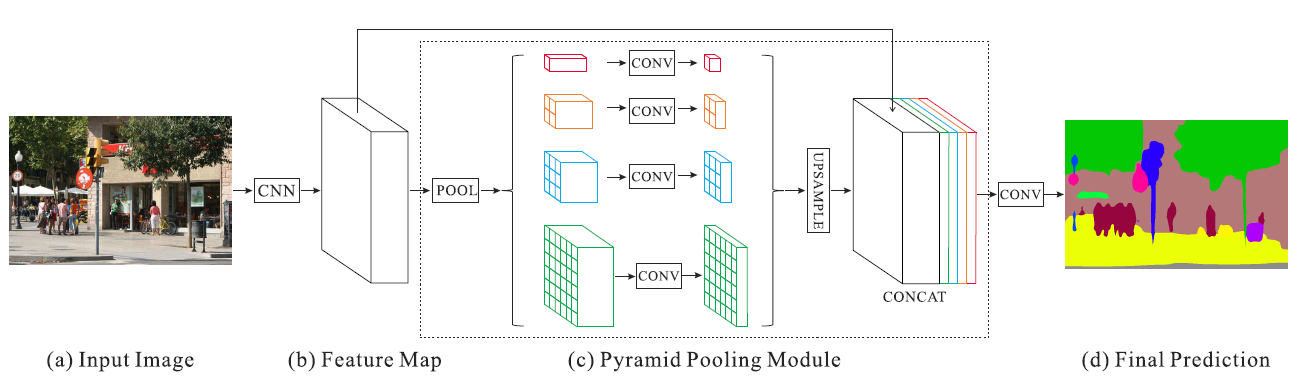

Utilizan el concepto de campo receptivo

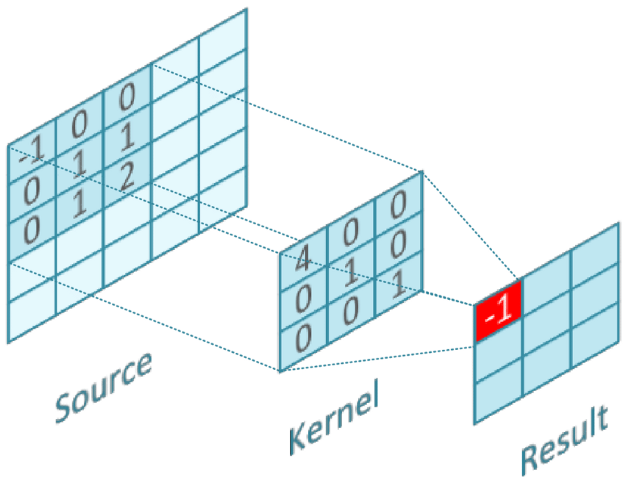

Para incrementarlo usan convoluciones dilatadas.

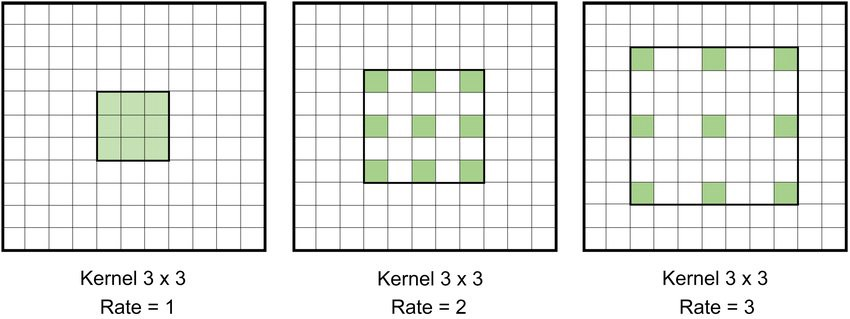

Ahora de tarea deberán hacer esta actividad

https://github.com/divamgupta/image-segmentation-keras